In [1]:
df_name = 'df.csv' # 'fd.csv' 'df.csv' #
target = 'Survived'  # 'fd_taken'   'Survived'
algo = 'LR' # RF LR NB SV DT all

In [2]:
%run 101_imports.ipynb

In [3]:
supress_warnings = False #True #False

In [4]:
curr_dir = os.getcwd()
curr_dir

'C:\\Users\\sunitha G\\dm_offshore\\v_0_1\\code\\methods'

In [5]:
%run 001_setup_path.ipynb

In [6]:
# Load all methods
%run 011_a_flow_preprocess_non_interactive_v_0_2.ipynb

<Figure size 432x288 with 0 Axes>

In [7]:
sys.path.append(methods_path)
from setup_input_002 import *

validation_set_name,columns_to_drop,columns_to_convert,df_processed_final = setup_input_new(df_name,algo)

In [8]:
df_name,target,validation_set_name,columns_to_drop,columns_to_convert,df_processed_final,algo

('df.csv',
 'Survived',
 'validation_set.csv',
 ['PassengerId', 'Ticket', 'Name', 'Cabin'],
 ['Pclass', 'Age', 'SibSp', 'Parch'],
 'df_processed_final.csv',
 'LR')

In [9]:
output_path_results

'C:\\Users\\sunitha G\\dm_offshore\\v_0_1\\output\\results'

In [10]:
# Define data and target
path = output_path_csvs

# Load data
df = read_file(df_processed_final,path) 

In [11]:
# test point
df.head(10)

Survived  Pclass   Age  SibSp  Parch       Fare  Embarked_Q  Embarked_S  \
0         0     3.0  22.0    0.0    0.0  31.815983           0           1   
1         1     3.0  22.0    0.0    0.0  31.815983           0           1   
2         0     3.0  35.0    0.0    0.0   8.050000           0           1   
3         0     3.0  22.0    0.0    0.0   8.458300           1           0   
4         0     1.0  54.0    0.0    0.0  51.862500           0           1   
5         0     3.0   2.0    3.0    1.0  21.075000           0           1   
6         1     3.0  27.0    0.0    2.0  11.133300           0           1   
7         1     2.0  14.0    1.0    0.0  30.070800           0           0   
8         1     3.0   4.0    1.0    1.0  16.700000           0           1   
9         1     1.0  58.0    0.0    0.0  26.550000           0           1   

   Sex_male  
0         1  
1         1  
2         1  
3         1  
4         1  
5         1  
6         0  
7         0  
8         0  
9         0

In [12]:
target

'Survived'

In [13]:
X = df.drop(target,axis=1)

In [14]:
y = df[target]

In [15]:
X.head(10)

Pclass   Age  SibSp  Parch       Fare  Embarked_Q  Embarked_S  Sex_male
0     3.0  22.0    0.0    0.0  31.815983           0           1         1
1     3.0  22.0    0.0    0.0  31.815983           0           1         1
2     3.0  35.0    0.0    0.0   8.050000           0           1         1
3     3.0  22.0    0.0    0.0   8.458300           1           0         1
4     1.0  54.0    0.0    0.0  51.862500           0           1         1
5     3.0   2.0    3.0    1.0  21.075000           0           1         1
6     3.0  27.0    0.0    2.0  11.133300           0           1         0
7     2.0  14.0    1.0    0.0  30.070800           0           0         0
8     3.0   4.0    1.0    1.0  16.700000           0           1         0
9     1.0  58.0    0.0    0.0  26.550000           0           1         0

In [16]:
y.head(10)

0    0
1    1
2    0
3    0
4    0
5    0
6    1
7    1
8    1
9    1
Name: Survived, dtype: int64

In [17]:
threshold=0.545
X,to_drop = drop_correlated_columns(X,threshold)

In [18]:
# test point
X.head(10)

Pclass   Age  SibSp  Parch  Embarked_Q  Embarked_S  Sex_male
0     3.0  22.0    0.0    0.0           0           1         1
1     3.0  22.0    0.0    0.0           0           1         1
2     3.0  35.0    0.0    0.0           0           1         1
3     3.0  22.0    0.0    0.0           1           0         1
4     1.0  54.0    0.0    0.0           0           1         1
5     3.0   2.0    3.0    1.0           0           1         1
6     3.0  27.0    0.0    2.0           0           1         0
7     2.0  14.0    1.0    0.0           0           0         0
8     3.0   4.0    1.0    1.0           0           1         0
9     1.0  58.0    0.0    0.0           0           1         0

In [19]:
os.getcwd()

'C:\\Users\\sunitha G\\dm_offshore\\v_0_1\\output\\csvs'

In [20]:
# Split data into train and test
test_size=0.20
random_state=100
X_train,X_test,y_train,y_test = split(X,y,test_size,random_state)

In [21]:
print(' Shape of train set :',X_train.shape)
log_to_file('Shape of train set : ',output_path_results)
log_to_file_result(X_train.shape,output_path_results)

 Shape of train set : (393, 7)


In [22]:
print(' Shape of train set :',X_test.shape)
log_to_file('Shape of test set : ',output_path_results)
log_to_file_result(X_test.shape,output_path_results)

 Shape of train set : (99, 7)


In [23]:
# Train the model
X_train,y_train,model = train_model(X_train,X_test,y_train,y_test,X,y,algo,df)
if(supress_warnings != True):
    if(algo == 'RF'):
        feat_importances = feature_importance(X,model) # Causing warning in log
        print(' Features used :',feat_importances)
        log_to_file('Features used : ',output_path_results)
        log_to_file_result(feat_importances,output_path_results)

In [24]:
os.getcwd()

'C:\\Users\\sunitha G\\dm_offshore\\v_0_1\\output\\results'

In [25]:
# Save model
save_model(models_path,model,algo)

if(algo == 'SV'):
    # Predict the results
    pred,conf_matrix,clas_report,acc_score= predict_results(model,X_test,y_test)
else:
    # Predict the results    
    pred,pred_proba,conf_matrix,clas_report,acc_score= predict_results(model,X_test,y_test)
    
# Confusion Matrix
print('Confusion Matrix : \n ',conf_matrix)
log_to_file('Confusion Matrix :',output_path_results)
log_to_file_result(conf_matrix,output_path_results)

# Classification Report
print(' \n Classification Report : \n ',clas_report)
log_to_file(' Classification Report :',output_path_results)
log_to_file_result(clas_report,output_path_results)

# Accuracy
print(' \n Accuracy : \n ',acc_score*100)
log_to_file(' Accuracy :',output_path_results)
log_to_file_result(acc_score*100,output_path_results)


Confusion Matrix : 
  [[41 13]
 [16 29]]
 
 Classification Report : 
               precision    recall  f1-score   support

          0       0.72      0.76      0.74        54
          1       0.69      0.64      0.67        45

avg / total       0.71      0.71      0.71        99

 
 Accuracy : 
  70.70707070707071


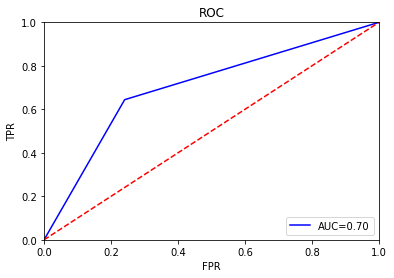

In [26]:
if(supress_warnings != True):
    roc_curve_plot(y_test,pred) # # Causing warning in log

In [27]:
decile_df = pd.DataFrame()
decile_df['y_true'] = y_test
# decile_df['y_prob'] = pred_proba
decile_df['y_pred'] = pred
# decile_df['decile'] = pd.cut(decile_df['y_prob'],10,labels=range(10,0,-1))
if(algo != 'SV'):
    decile_df['y_prob'] = pred_proba
    decile_df['decile'] = pd.cut(decile_df['y_prob'],10,labels=range(10,0,-1))


In [28]:
output_path_results

'C:\\Users\\sunitha G\\dm_offshore\\v_0_1\\output\\results'

In [29]:
decile_results = decile_analysis(decile_df,algo)
print(decile_results)
log_to_file_result(decile_results,output_path_results)

base_response_rate : 
 45.45
        zero  one  min_prob  max_prob  count   gain  cum_gain  penetration
decile                                                                    
1.0        2    8  0.861630  0.952143     10  17.78     17.78         80.0
2.0        0   10  0.775803  0.849031     10  22.22     40.00        100.0
3.0        5    5  0.620114  0.771549     10  11.11     51.11         50.0
4.0        6    4  0.548302  0.620114     10   8.89     60.00         40.0
5.0        4    6  0.402225  0.548302     10  13.33     73.33         60.0
6.0        6    4  0.316617  0.394000     10   8.89     82.22         40.0
7.0        8    2  0.248367  0.308354     10   4.44     86.66         20.0
8.0        7    3  0.198159  0.248207     10   6.67     93.33         30.0
9.0        7    3  0.131934  0.197789     10   6.67    100.00         30.0
10.0       9    0  0.065697  0.131649      9   0.00    100.00          0.0


In [30]:
pd.crosstab(decile_df['decile'],decile_df['y_true'],margins=True)

y_true   0   1  All
decile             
1.0      2   8   10
2.0      0  10   10
3.0      5   5   10
4.0      6   4   10
5.0      4   6   10
6.0      6   4   10
7.0      8   2   10
8.0      7   3   10
9.0      7   3   10
10.0     9   0    9
All     54  45   99